## tQST at work
In this notebook we are going to perform tQST in different ways:
* First we will see how to perform *t*QST on a 5-qubit $W$ state in a simulated way, without using experimental measurements.
* We will repeat the procedure for a random pure state.
* Then we will perform *t*QST of a 3-qubit $W$ state providing the measurements in two different ways.

First of all, we import the required dependencies for the simulated experiments.

In [1]:
import density_matrix_tool as dmt
import projectors_tQST_local as prj
import counts_tQST as cnt
from maximum_likelihood import *

## Tomography of a (simulated) Bell state

Number of measurements: 6
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


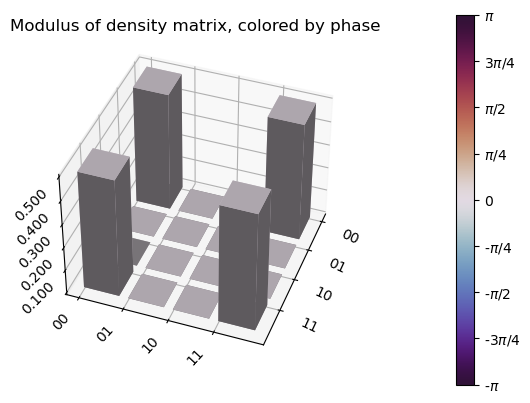

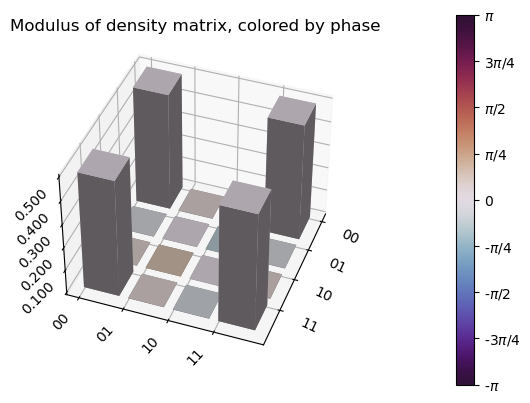

Fidelity with respect to the target state: 0.998812552184414


In [10]:
nq  = 2
rho = dmt.density_matrix_GHZ(nq)

P = prj.Projectors_tQST_qubit_local(nq)
C = cnt.Counts_tQST(P)

C.set_density_matrix(rho)
threshold = dmt.gini_index(np.diagonal(rho))
mel = C.get_matrix_elements_tQST(threshold)

projs, counts = C.get_counts_from_mat_el(mel)
print('Number of measurements:', len(counts))
# print(projs)
# plus_modified1 = np.array([t_s1, t_l1])
# plus_modified2 = np.array([t_s2, t_l2])
# plus_mod np.kron()
projs[4,:] = np.array([0.45+0j, 0.45+0j, 0.45+0j, 0.45+0j]) / np.linalg.norm(np.array([0.45+0j, 0.45+0j, 0.45+0j, 0.45+0j]), ord=2)

ml = Maximum_likelihood_tomography(nq, model=model_triangular)
ml.set_counts(projs, counts)
res = ml.minimize()
print(res.message)
rho_reconstructed = ml.model_density_matrix()

dmt.plot_density_matrix_3D(rho)
dmt.plot_density_matrix_3D(rho_reconstructed)
print('Fidelity with respect to the target state:', dmt.fidelity(rho_reconstructed, rho))

# Tomography of a Bell state with experimental data

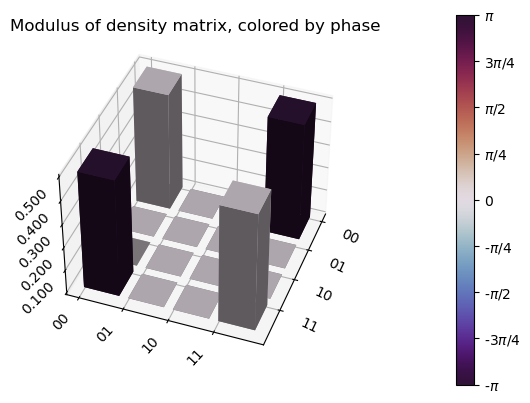

In [3]:
true_rho = np.zeros((4,4), dtype=complex)
true_rho[0,0] += 0.5
true_rho[3,3] += 0.5
true_rho[0,3] -= 0.5
true_rho[3,0] -= 0.5
dmt.plot_density_matrix_3D(true_rho)

Number of qubits set to 2.
Diagonal counts are now set.
The threshold is now set to 0.1663801540893919.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


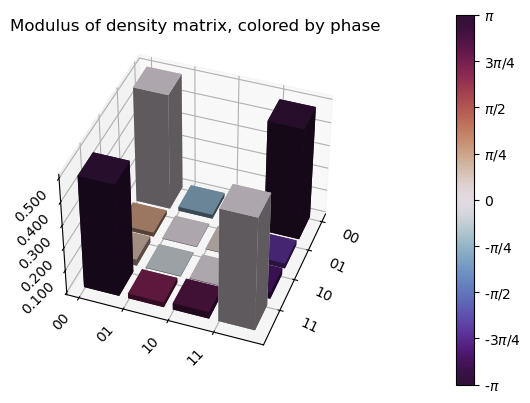

Fidelity with true state: 0.9925186524163339


In [8]:
from tqst_class import *

tomo = tQST(2)
nq = tomo.get_num_of_qubits()

diagonal = np.array([40230, 150, 220, 39094])
N = np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = dmt.gini_index(diagonal)
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
# tdict.setdefault('HH', 40230)
# tdict.setdefault('HV', 150)
# tdict.setdefault('VH', 220)
# tdict.setdefault('VV', 39094)
tdict.setdefault('DD', 333/N)
tdict.setdefault('DR', 20475/N)

projs, counts = tomo.read_tomo_dictionary(tdict)
# print(projs)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)
print('Fidelity with true state:', dmt.fidelity(rho_rec, true_rho))